<a href="https://colab.research.google.com/github/RohaidAhmed/xyz/blob/main/Transfer_Learning_Inception_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DR Transfer Learning Inception-V3**

**Import data from gogle drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import Keras**

In [2]:
# !pip install -q keras

In [3]:
# import keras

In [4]:
# !pip install tensorflow-gpu

In [5]:
!nvidia-smi

Thu Apr 13 10:01:27 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**Transfer Learning Inception V3 Using Keras**

In [6]:
# from tensorflow.compat.v1 import ConfigProto
# from tensorflow.compat.v1 import InteractiveSession

# config = ConfigProto()
# config.gpu_options.per_process_gpu_memory_fraction = 0.5
# config.gpu_options.allow_growth = True
# session = InteractiveSession(config=config)

In [7]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [8]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/DATASETS__resize_split/val'
valid_path = '/content/drive/MyDrive/DATASETS__resize_split/test'

In [9]:
# Import the Inception V3 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 =VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [10]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = True

In [11]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/DATASETS__resize_split/val*')

In [12]:
folders

['/content/drive/MyDrive/DATASETS__resize_split/val']

In [13]:
# our layers - you can add more if you want
x = Flatten()(vgg16.output)



In [14]:
prediction = Dense(5, activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)


In [15]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [16]:
import matplotlib.pyplot as plt


In [17]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [18]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


In [19]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/DATASETS__resize_split/val',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 7033 images belonging to 5 classes.


In [20]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/DATASETS__resize_split/test',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 7030 images belonging to 5 classes.


In [21]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
440/440 [==============================] - 359s 771ms/step - loss: 0.9404 - accuracy: 0.7308 - val_loss: 0.9355 - val_accuracy: 0.7343
Epoch 2/20
440/440 [==============================] - 143s 325ms/step - loss: 0.8966 - accuracy: 0.7334 - val_loss: 0.8922 - val_accuracy: 0.7343
Epoch 3/20
440/440 [==============================] - 145s 330ms/step - loss: 0.8819 - accuracy: 0.7354 - val_loss: 0.8784 - val_accuracy: 0.7343
Epoch 4/20
440/440 [==============================] - 159s 362ms/step - loss: 0.8715 - accuracy: 0.7354 - val_loss: 0.8730 - val_accuracy: 0.7343
Epoch 5/20
440/440 [==============================] - 144s 328ms/step - loss: 0.8716 - accuracy: 0.7354 - val_loss: 0.8771 - val_accuracy: 0.7343
Epoch 6/20
440/440 [==============================] - 145s 330ms/step - loss: 0.8719 - accuracy: 0.7354 - val_loss: 0.8704 - val_accuracy: 0.7343
Epoch 7/20
440/440 [==============================] - 145s 329ms/step - loss: 0.8728 - accuracy: 0.7354 - val_loss: 0.8824 -

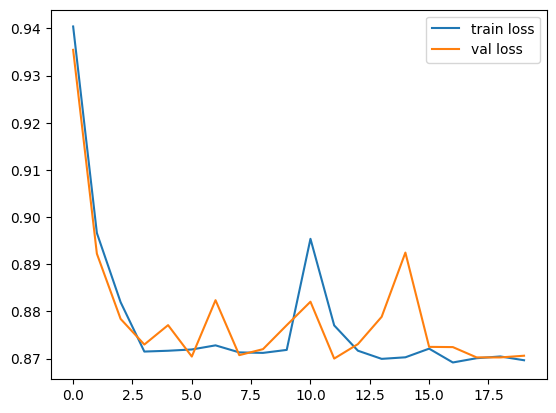

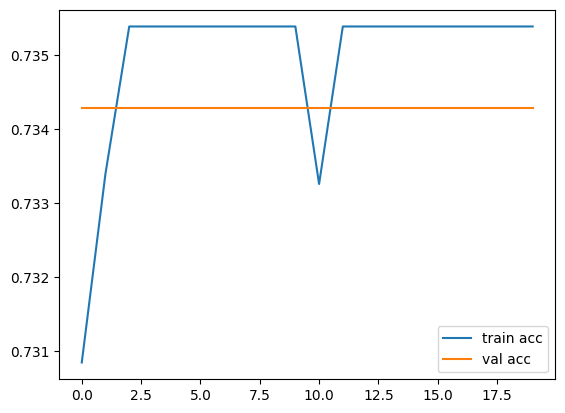

<Figure size 640x480 with 0 Axes>

In [22]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [23]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5'

SyntaxError: ignored

In [ ]:
y_pred = model.predict(test_set)

In [ ]:
y_pred

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)


In [ ]:
y_pred

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
img_data